# Explore LCDS as function of Alpha and of K

## First set up plotting in notebook

In [1]:
import matplotlib.pyplot as plt
import spacepy.plot as splot
%matplotlib inline

This unreleased version of SpacePy is not supported by the SpacePy team.


/home/steve/miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Import relevant packages for Shue magnetopause, IRBEM and LANL* NN

In [2]:
import spacepy.time as spt
import spacepy.empiricals as emp
import spacepy.omni as om
import spacepy.LANLstar as lns

### First, set timestamps at 30min cadence for Sept 24th dropout event

In [3]:
tt = spt.tickrange('2013-09-22T00:00:00','2013-09-27T00:00:00',0.5/24) #half hourly resolution
tt2 = spt.tickrange('2013-09-23T12:00:00','2013-09-25T00:00:00', 6./24) #6 hourly res, to be quicker

In [4]:
mp = emp.ShueMP(tt, dbase='qd1min')

Key ExtModel for conversion not found in file
Variable OriginFile appears to be non-record varying, skipping interpolation


### Now we have our timestamps and the Shue magnetopause stand-off location, get LCDS from LANL* NN

In [5]:
omdata = om.get_omni(tt, dbase='qd1min') #qd1min needs to be set in spacepy.rc file

Key ExtModel for conversion not found in file
Variable OriginFile appears to be non-record varying, skipping interpolation


In [6]:
omdata['DOY'] = tt.DOY
omdata['Hr'] = omdata['Hour']
omdata['PA'] = [90]*len(tt)
lcds = lns.LANLmax(omdata, ['T05'])

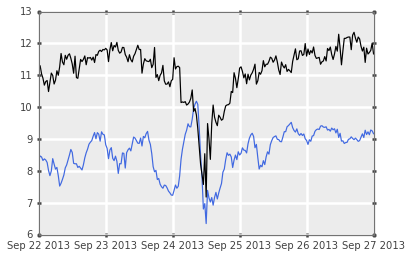

In [7]:
plt.plot(tt.UTC, lcds['T05'])
plt.plot(tt.UTC, mp, 'k-')

### Does this vary as a function of pitch angle?

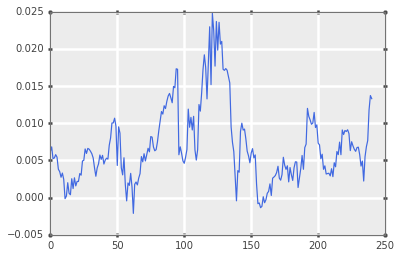

In [8]:
omdata['PA'] = [40]*len(tt)
lcds40 = lns.LANLmax(omdata, ['T05'])
plt.plot(lcds['T05']-lcds40['T05'])

### Yes, but only very little... let's see that for 90, 65, 40 and 15

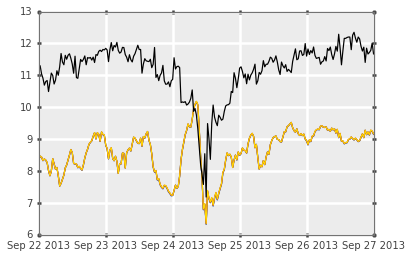

In [9]:
omdata['PA'] = [65]*len(tt)
lcds65 = lns.LANLmax(omdata, ['T05'])
omdata['PA'] = [15]*len(tt)
lcds15 = lns.LANLmax(omdata, ['T05'])
plt.plot(tt.UTC, lcds15['T05'])
plt.plot(tt.UTC, lcds40['T05'])
plt.plot(tt.UTC, lcds65['T05'])
plt.plot(tt.UTC, lcds['T05'])
plt.plot(tt.UTC, mp, 'k-')

So the differences are negligible...
Let's just find the maximum difference between a couple of these.

In [10]:
print((lcds['T05']-lcds15['T05']).max())
print((lcds['T05']-lcds15['T05']).min())

0.0375918668734
-0.00239455900337


## Now the slow part - finding LCDS as a function of K using IRBEM
### This can be done through SpacePy; for LANLGeoMag we need to just read the output files

In [11]:
import spacepy.irbempy as ib
import spacepy.coordinates as spc

In [12]:
omdata2 = om.get_omni(tt2) #don't use qd1min dbase for now... needs variable renamig, etc.

In [13]:
#irb_lcds = ib.find_LCDS_K(tt2, 0.1, extMag='T05', tol=0.1, omnivals=omdata2)
###once this is done, save output and read it back in here... comment code so we know how we got it
import spacepy.datamodel as dm
irb_lcds = dm.readJSONheadedASCII('irb_lcds.txt')

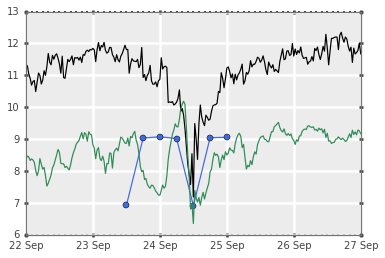

In [14]:
plt.plot(tt2.UTC, irb_lcds['LCDS'], marker='o')
splot.applySmartTimeTicks(plt.gca(), tt.UTC)
plt.plot(tt.UTC, mp, 'k-')
plt.plot(tt.UTC, lcds['T05'])

### Save IRBEM LCDS to JSON-headed ASCII file

In [32]:
#import spacepy.datamodel as dm

In [33]:
#dm.toJSONheadedASCII('irb_lcds.txt', irb_lcds)

### Now compare to LANLGeoMag output

Key ExtModel for conversion not found in file


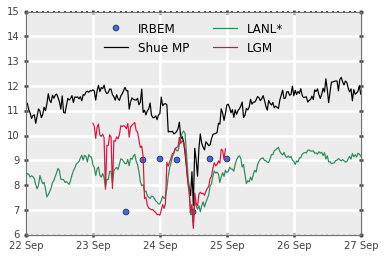

In [23]:
#get LGM output from file
lgm_lcds = dm.readJSONheadedASCII(['20130923_LCDS_TS04.txt','20130924_LCDS_TS04.txt'], convert=True)

#repeat plotting code but add line for LGM
plt.plot(tt2.UTC, irb_lcds['LCDS'], ls='None', marker='o', label='IRBEM')
splot.applySmartTimeTicks(plt.gca(), tt.UTC)
plt.plot(tt.UTC, mp, 'k-', label='Shue MP')
plt.plot(tt.UTC, lcds['T05'], label='LANL*')
plt.plot(lgm_lcds['DateTime'], lgm_lcds['LCDS'], label='LGM')
plt.ylim([6,15])
plt.legend(ncol=2, loc=9)